In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
import os
import numpy as np
import pandas as pd
import dask.bag as bag
from dask.diagnostics import ProgressBar
import matplotlib.pyplot as plt
from collections import defaultdict
import torch
import torchvision
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms import ToTensor
from torchvision.io import read_image
from torchvision.utils import make_grid
from PIL import Image

In [25]:
# do EDA for raw data

# EDA for re_sized + deleted images
new_path = "/content/drive/Shareddrives/RotNotCrew/dataset"
# food_names = ['Apple','Orange','Strawberry','Mango','Potato','Chile_Pepper',
#               'New_Mexico_Green_Chile','Banana','Carrot','Tomato','Cucumber',
#               'BellPepper']
food_names = ['Banana','Orange','Mango']

In [31]:
def get_dims(file):
  '''Returns dimenstions for an RBG image'''
  im = Image.open(file)
  arr = np.array(im)
  h,w,d = arr.shape
  return h,w

In [34]:
def size_scatter_plot(dir_type):
  for food in food_names:
    filepath = os.path.join(new_path,food,dir_type)
    filelist = [filepath + "/"+f for f in os.listdir(filepath)]
    print(get_dims(filelist[0]))
    dims = bag.from_sequence(filelist).map(get_dims)
    with ProgressBar():
      dims = dims.compute()
      dim_df = pd.DataFrame(dims, columns=['height', 'width'])
      sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0:'count'})
      sizes.plot.scatter(x='width', y='height');
      plt.title('Image Sizes (pixels) | {}'.format(food))

In [10]:
def image_counts(food_names,dir_path,sub_dirs):
  image_count = defaultdict(int)
  for food in food_names:
    for dirs in sub_dirs:
      image_count[food] += len(os.listdir(os.path.join(dir_path,food,dirs)))

  return image_count

In [11]:
def box_plot(data_dict):
  plt.rcParams["figure.figsize"] = (25,3)
  plt.bar(data_dict.keys(), data_dict.values());
  plt.title("Number of Images by Class");
  plt.xlabel('Class Name');
  plt.ylabel('# Images');
  plt.show()

In [12]:
def data_loader_obj(data_dir,food,batch_size):
  dataset = ImageFolder(os.path.join(data_dir,food), transform=ToTensor())
  data_load_obj = DataLoader(dataset,batch_size,shuffle = True)
  return data_load_obj


In [13]:
def show_image_sample(data_loader,label):
  cnt = 0
  for images, labels in data_loader:
    final_images = []
    for i in range(len(images)):
      if labels[i] == label:
        final_images.append(images[i])
        cnt += 1

    fig, ax = plt.subplots(figsize=(12,12))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(final_images, nrow=8).permute(1,2,0))
    break



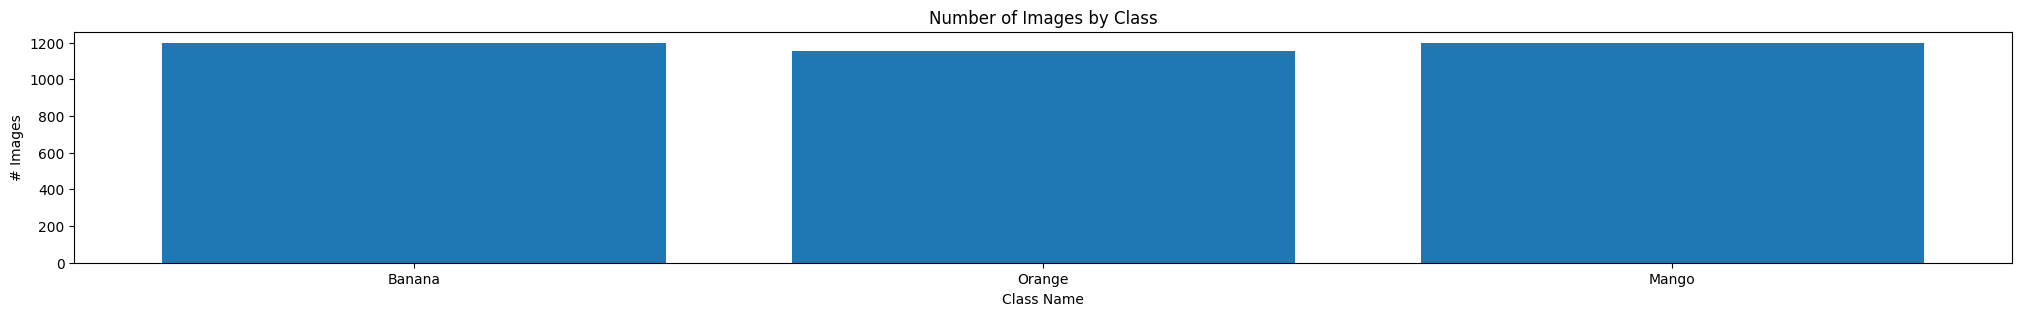

In [26]:
# all data
data_count = image_counts(food_names,new_path,["final_ripe","final_rotten"])
box_plot(data_count)
#size_scatter_plot("final_ripe")

(256, 256)
[########################################] | 100% Completed | 3.41 s
(256, 256)
[########################################] | 100% Completed | 2.81 s
(256, 256)
[########################################] | 100% Completed | 2.61 s


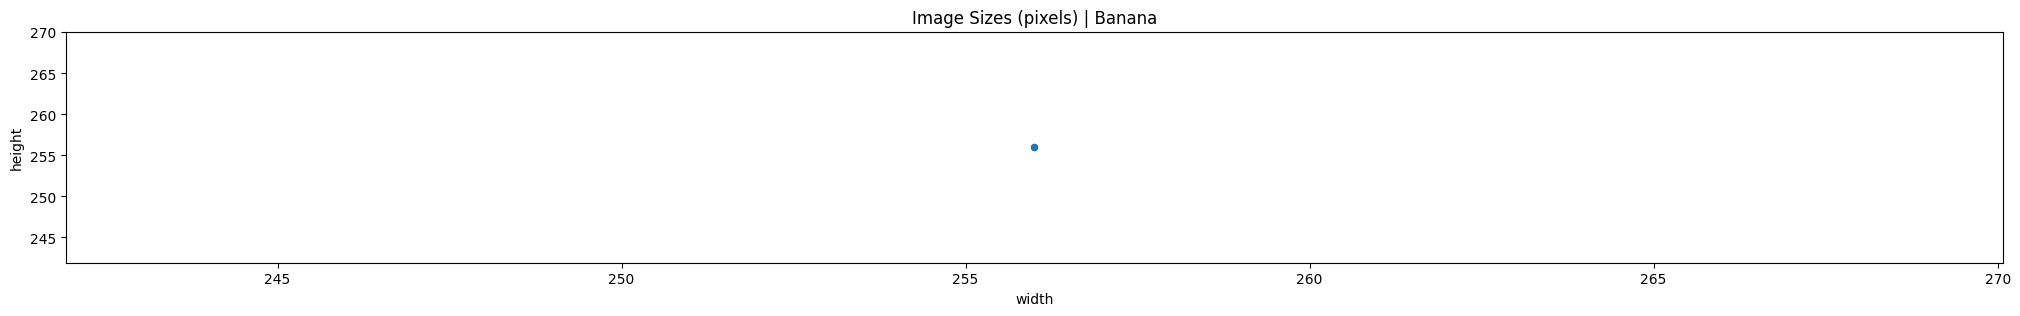

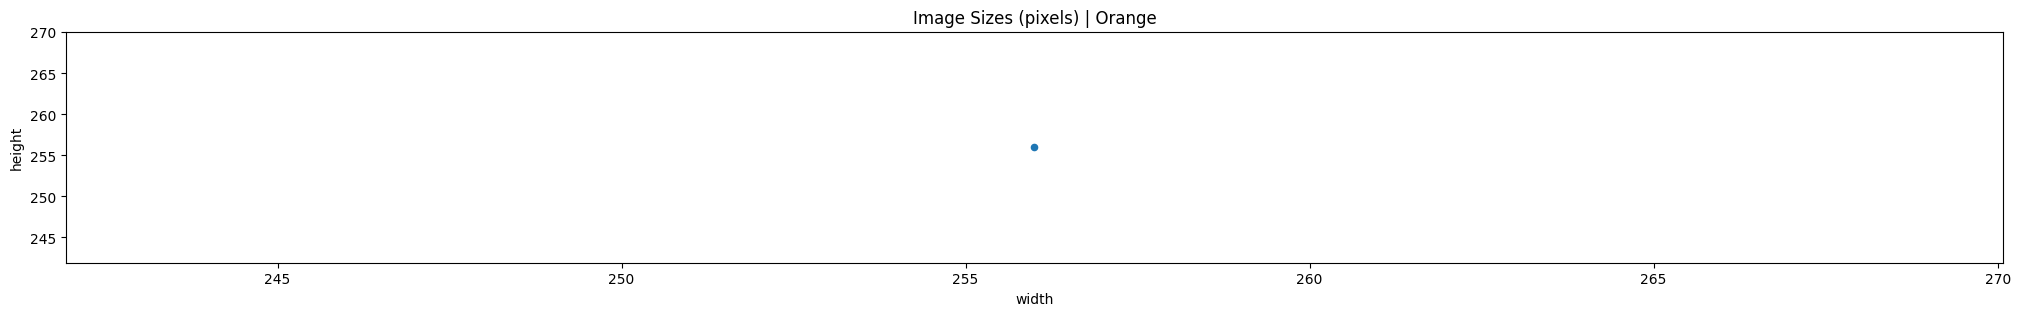

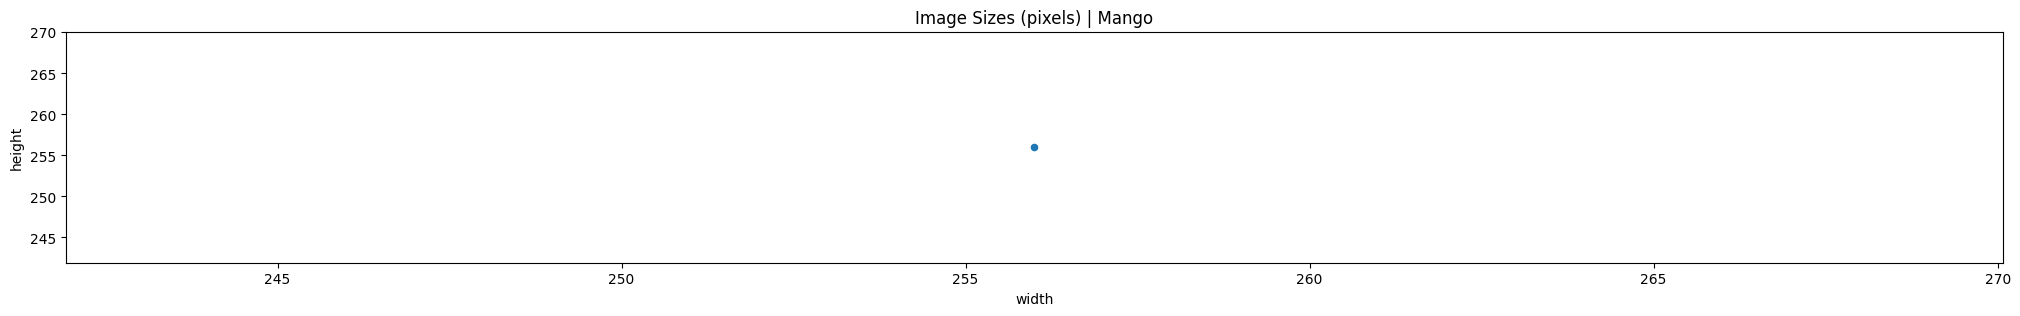

In [35]:
size_scatter_plot("final_ripe")

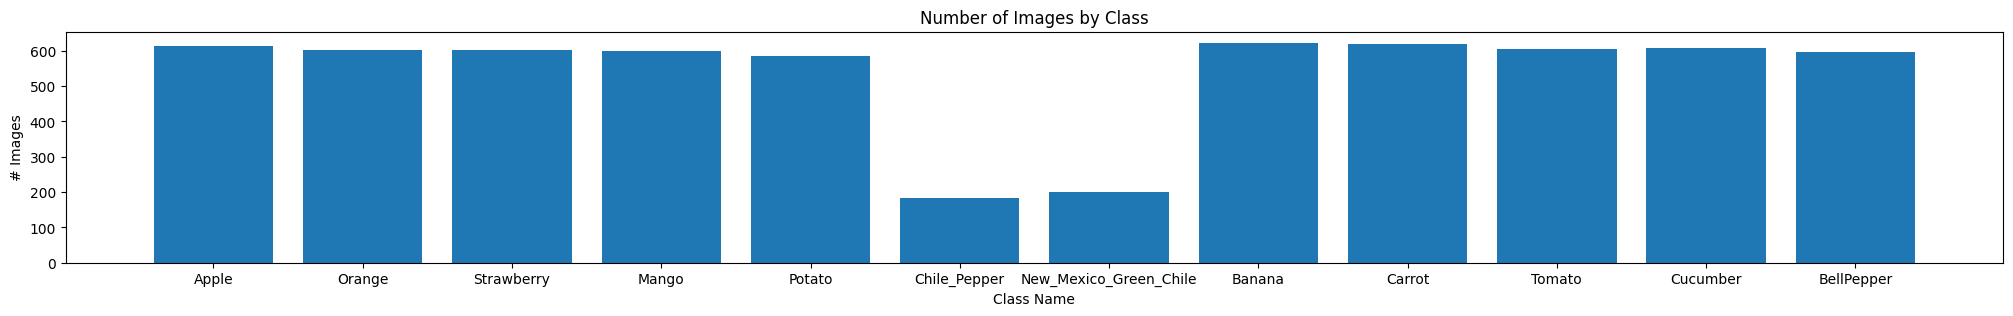

In [ ]:
# ripe images
data_count = image_counts(food_names,new_path,["final_ripe"])
box_plot(data_count)

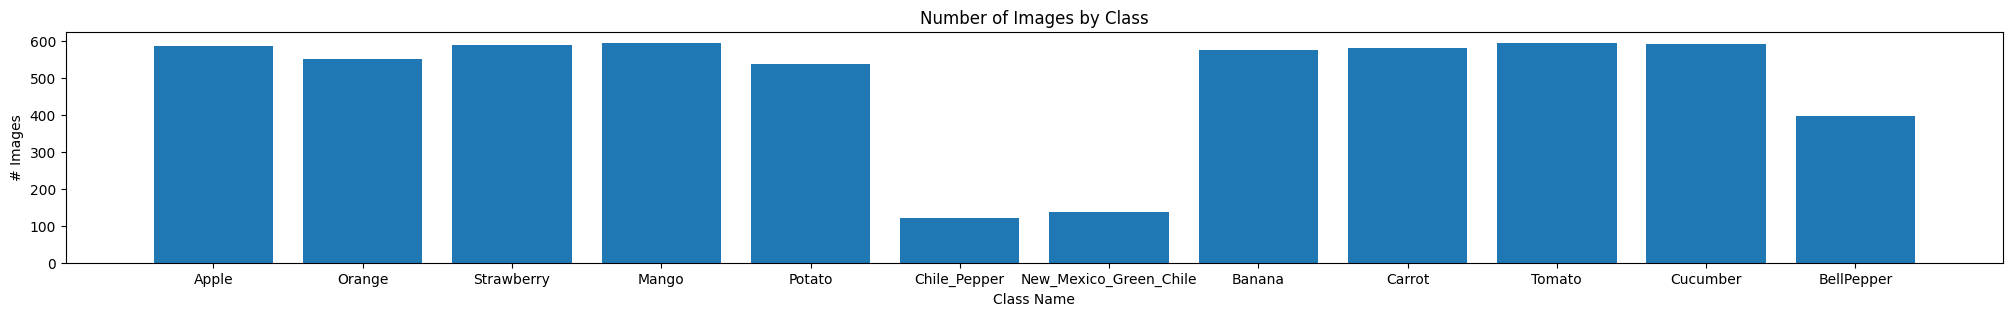

In [ ]:
# rotten images
data_count = image_counts(food_names,new_path,["final_rotten"])
box_plot(data_count)

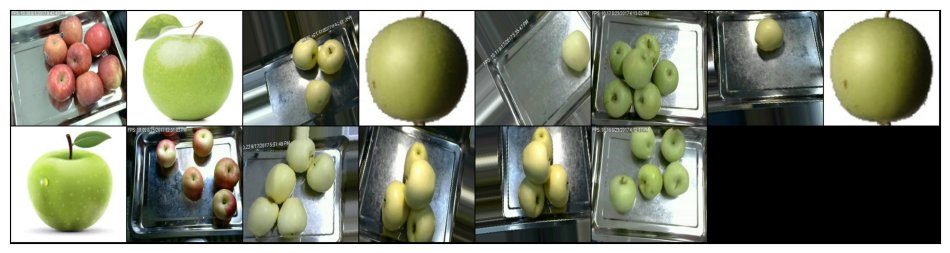

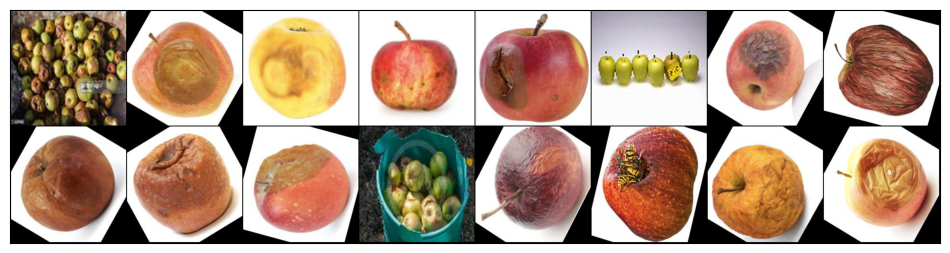

In [ ]:
apple_obj = data_loader_obj(new_path,"Apple",32)
show_image_sample(apple_obj,0)
show_image_sample(apple_obj,1)

